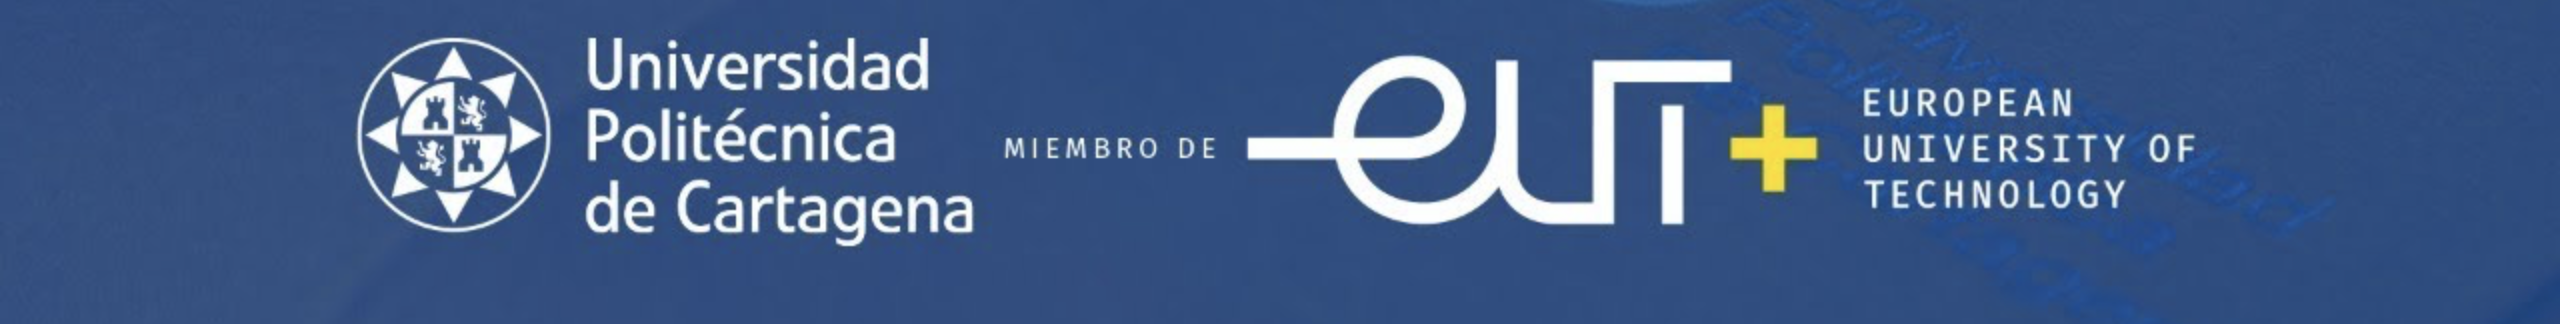
**MACHINE LEARNING II**

# PRÁCTICA 2. SESIÓN 2 
# ALGORITMO DE VITERBI
# ALGORITMOS DE AVANCE Y RETROCESO
# ALGORITMO DE BAUM-WELCH

Los objetivos de aprendizaje de esta práctica son:
1) Implementar el algoritmo de Viterbi en Python y emplearlo para encontrar la secuencia más probable de estados ocultos dado un conjunto de observaciones.
2) Implementar los algoritmos de avance y retroceso.
3) Implementar el algoritmo de Baum-Welch y emplearlo para aprender el HMM subyacente a partir de los datos observados.


En primer lugar, importaremos las librerías necesarias para la práctica:

- import numpy as np 
- import matplotlib.pyplot as plt
- from hmmlearn import hmm


In [1]:
# Importe las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm


                                     EJERCICIO 1.1. IMPLEMENTACIÓN DEL ALGORITMO DE VITERBI                                             

En este ejercicio, se implementará el algoritmo de Viterbi para modelos de Markov ocultos (HMM), aplicado a la predicción del tiempo. Como se ha visto en teoría, no podemos conocer cuál es el estado actual, pero podemos trabajar con observaciones (o *evidencia*). 

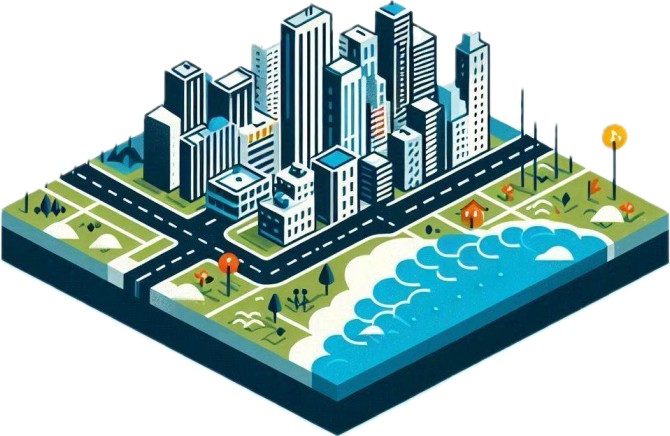

Considere el siguiente escenario: 
Se dispone de un teléfono que no tiene instalada la aplicación "tiempo", sino únicamente redes sociales; y aunque no se pueda conocer explícitamente qué tiempo hace en una determinada ciudad, sí que podemos adivinarlo gracias a estas últimas. Esto es debido a que cada día un compañero de trabajo sube a sus historias si va al trabajo en coche (probablemente porque esté lloviendo), en bicicleta (puede que esté nublado, o que haga sol), o andando (lo más problable si hace un buen día). Teniendo en cuenta lo anterior, se pide:

- Implemente la función "viterbi", la cual deberá de tomar las matrices de transición y emisión, las probabilidades iniciales y la secuencia de observaciones.

- Implemente la función "predicción_tiempo", la cual tomará el modelo del HMM y la secuencia de observaciones. Deberá llamar a la función "viterbi" con objeto de adivinar la secuencia de estados más probable.

Los datos necesarios son los siguientes:

modelo_hmm = {
    'transicion': {
        'soleado': {'soleado': 0.7, 'nublado': 0.2, 'lluvioso': 0.1},
        'nublado': {'soleado': 0.3, 'nublado': 0.4, 'lluvioso': 0.3},
        'lluvioso': {'soleado': 0.2, 'nublado': 0.3, 'lluvioso': 0.5}
    },
'emision': {
        'soleado': {'andando': 0.8, 'bicicleta': 0.1, 'coche': 0.1},
        'nublado': {'andando': 0.2, 'bicicleta': 0.7, 'coche': 0.1},
        'lluvioso': {'andando': 0.1, 'bicicleta': 0.3, 'coche': 0.6}
    }, 
 'inicio_prob': {'soleado': 0.5, 'nublado': 0.3, 'lluvioso': 0.2}
}

- Secuencia de observaciones (temperaturas observadas)
observaciones = ['andando', 'bicicleta', 'coche', 'andando', 'coche']

Recuerde que las probabilidades iniciales son las probabilidades de cada estado el primer día; las probabilidades de transición son las probabilidades de pasar de un estado a otro, y las probabilidades de emisión son las probabilidades de observar un evento dado el estado oculto.


*1) IMPLEMENTE LA FUNCIÓN ''VITERBI''*

Pasos a seguir:

- Defina una función llamada "viterbi" que tome como argumentos las matrices de transición y emisión, las probabilidades iniciales, las observaciones y los posibles estados.

- Cree una matriz "V" que almacene las probabilidades de la secuencia más probable de estados hasta cada observación y otra llamada "path" que almacene los indices de los estados anteriores para poder alcanzar el camino óptimo (o de máxima verosimilitud).

- Defina unos diccionarios para poder mapear correctamente los nombres de estados y observaciones a índices numéricos. Aunque no es un paso crítico para la realización del ejercicio, facilitará en gran medida su posterior implementación.

- Inicialice la primera columna de "V" usando las probabilidades inciales y de emisión para la primera observación

- Para la recursión:
    - Para cada observación y cada estado, el código debe calcular la probabilidad máxima de llegar al estado s en el tiempo t. Se considera todas las posibles transiciones desde el estado en el tiempo t-1, multiplicando la probabilidad de estar en ese estado en el tiempo t-1, la probabilidad de transición al estado s, y la probabilidad de emisión de la observación en el estado s. Se guarda la probabilidad máxima y el estado que proporciona esa probabilidad. El código de esta recursión es el siguiente: 



In [ ]:
for t in range(1, num_observaciones):
    for s in range(num_estados):
        max_prob, max_state = max(
            (V[prev_state, t-1] * transicion[estados[prev_state]][estados[s]] * emision[estados[s]][observaciones[t]], prev_state)
            for prev_state in range(num_estados)
        )
        V[s, t] = max_prob
        path[s, t] = max_state


- Una vez alcanzado el último instante, se encuentra el estado de probabilidad máxima en la última columna de "V" y, seguidamente, se traza el camino óptimo a través de la matriz "path".

- Finalmente, se "traduce" la secuencia de índices de estados a nombres de estados y se devuelve como resultado.

*2) IMPLEMENTE LA FUNCIÓN "tiempo_pasado"*

Esta función deberá tomar como argumentos el modelo de Markov oculto definido anteriormente y las observaciones.

*3) DEFINA LOS DATOS DEL EJERCICIO*

*4) POR ÚLTIMO, OBTENGA LA SECUENCIA DE ESTADOS MÁS PROBABLE:                                                                
 (estimación de máxima verosimilitud de la secuencia más probable de estados ocultos)*

                                              EJERCICIO 1.2. ALGORITMOS DE AVANCE Y RETROCESO                                                      

Antes de empezar con el ejercicio, es conveniente recordar que, mientras que el algoritmo de Viterbi se encarga de obtener la secuencia de estados ocultos más probable, los algoritmos de avance y retroceso tienen otros propósitos:

- El algoritmo de avance (o *forward algorithm*) calcula la probabilidad (conjunta) de encontrarse en un estado con una secuencia concreta de observaciones hasta ese momentos.

- El algorimo de retroceso (o *backward algorithm*) calcula la probabilidad (condicionada) de una secuencia de observaciones futuras dado el estado en que nos encontramos. 

En otras palabras:

El algoritmo de avance nos proporciona, por ejemplo, P(X_4, Y_1, Y_2, Y_3, Y_4), que llamaremos "alpha". En general, su fórmula es:

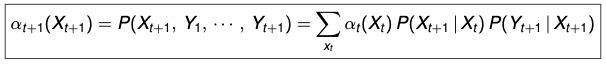

El algoritmo de retroceso nos proporciona, por ejemplo, P(Y_5, Y_6, Y_7 ⎮ X_4), que llamaremos "beta". En general, su formula es:

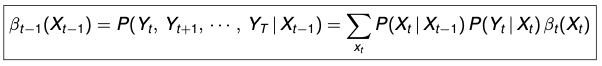


*1) DEFINA EL HMM*

En el código que se proporciona a continuación, se definen una serie de variables:

- "start_probability": corresponde a las probabilidades iniciales, las cuales serán 'soleado': 0.5, 'nublado': 0.3 y 'lluvioso': 0.2.

- "transition_probability": matriz de probabilidades de transición entre estados. 

- "emission_probability": matriz de probabilidades de emisión de observaciones dados los estados.

- "observations": La secuencia de observaciones, en este caso será  ['andando', 'coche', 'coche', 'andando', 'bicicleta', 'andando', 'bicicleta', 'coche', 'coche', 'bicicleta']

*2) IMPLEMENTE EL ALGORITMO DE AVANCE Y MUESTRE POR PANTALLA LA MATRIZ ALPHA JUNTO A LA PROBABILIDAD DE LA SECUENCIA DE OBSERVACIONES*

Calcule la probabilidad de que el cuarto día sea lluvioso sabiendo que las observaciones hasta ese día son: 'coche', 'bicicleta', 'andando', 'bicicleta'.

Para ello, deberá de seguir una serie de pasos:

- Cree una función llamada "forward" que tome como argumentos las probabilidades iniciales, las matrices de transición y emisión y las observaciones. La función forward calcula la matriz α (alpha), que representa la probabilidad de estar en cada estado en el tiempo t, dado el conjunto de observaciones hasta el tiempo t.

- Inicialización: Para el primer tiempo t=0, calculamos α_0(s) para cada estado s como el producto de la probabilidad inicial de estar en el estado 
s y la probabilidad de emitir la observación en t=0 dado el estado s.

- Recursión: Para cada tiempo t desde 1 hasta T−1 (donde T es la longitud de la secuencia de observaciones), calculamos α_(s) para cada estado s como la suma del producto de α_t−1(s0), la probabilidad de transición de s0 a s, y la probabilidad de emitir la observación en t dado el estado s.


A continuación, empleando el mismo modelo, implemente el código para el algoritmo de retroceso y calcule la probabilidad de que las observaciones futuras sean: quinto día 'soleado', sexto día 'lluvioso', séptimo día 'nublado', sabiendo que el cuarto día fue 'soleado'.

- Defina una función "backward" que calcule la matriz β (beta), que representa la probabilidad de las observaciones futuras dado el estado actual en el tiempo t.

Para realizar lo indicado:

- Inicialización: Para el último tiempo t=T−1, establecemos β_T−1(s) como 1 para cada estado s.

- Recursión: Para cada tiempo t desde T−2 hasta 0, calculamos β_t(s) para cada estado s como la suma del producto de β_t+1(s1), la probabilidad de transición de s a s1, y la probabilidad de emitir la observación en t+1 dado el estado s1.

                                                   EJERCICIO 1.3: ALGORITMO DE BAUM-WELCH                                                            

El algoritmo de Baum-Welch consta de dos pasos que se van repitiendo iterativamente, uno a continuación del otro:

1) "Paso E" (o "E-step), el cual calcula la expectativa de la variable latente (o estado oculto) dados los parámetros actuales del modelo.
2) "Paso M" (o "M-step"), el cual actualiza los parámetros del modelo en base a la maximización de la expectativa calculada en el paso E.

Se comenzará definiendo el modelo con las mismas observaciones y estados que en los ejercicios anteriores:

- Posibles observaciones: 'andando', 'bicicleta', 'coche'.
- Posibles estados: 'soleado', 'nublado', 'lluvioso'.

Las matrices de transición, emisión y las probabilidades iniciales se inicializarán aleatoriamente y luego se actualizarán usando el algoritmo de Baum-Welch.

*IMPLEMENTE EL ALGORITMO DE BAUM-WELCH*

Para realizar lo indicado, siga los siguientes pasos:

 1) Comience inicializando los parámetros con los que se va a trabajar: las matrices de transición (A), emisión (B) y el vector de probabilidad inicial (pi) se inicializan aleatoriamente utilizando la distribución de Dirichlet para asegurar que la suma de cada fila sea 1.
    - La distribución de Dirichlet es una distribución de probabilidad continua. Es útil cuando se necesita generar vectores de probabilidad que sumen 1, como en el caso de las matrices de transición y emisión de un HMM. Un ejemplo de su uso, sería el siguiente:

In [ ]:
transicion_matriz = np.random.dirichlet(alpha, size=num_estados)

2) Vuelva a hacer uso de los algoritmos de avance y retroceso:
    - "forward": calcula la matriz α usando el algoritmo de avance.
    - "backward": calcula la matriz β usando el algoritmo de retroceso.

3) Implemente el algoritmo de Baum-Welch; para ello, tenga en cuenta lo siguiente:
    - Tome como parámetros la secuencia observada, las matrices A y B, el vector de probabilidad inicial (pi) y el número de iteraciones.
    - Se ejecutará durante un número de iteraciones "n_iter".
    - En cada iteración, se calculan las matrices alpha y beta.
    - Se calculan las matrices que representan las probabilidades de transición y de emisión en cada tiempo t.

CÁLCULO DE γ Y ξ (Paso E ó E-step) :

ξ_t(i,j) es la probabilidad de estar en el estado i en el tiempo t y en el estado j en el tiempo t+1, dado el modelo y la secuencia de observaciones. Se calcula como:

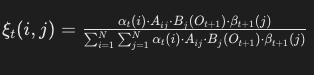

Para inicializarlo, xi se inicializa como una "matriz tridimensional" (un *tensor*) de ceros con dimensiones (T-1, N, N). El valor T-1 (y no T) se debe a que estamos considerando transiciones entre estados, y hay T-1 transiciones para una secuencia de longitud T.


In [ ]:
xi = np.zeros((T-1, N, N))

γ_t(i) es la probabilidad de estar en el estado i en el tiempo t, dado el modelo y la secuencia de observaciones. Se calcula como:

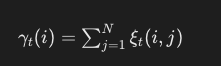

Para implementarlo se usará el siguiente código:

   

In [ ]:
gamma = np.sum(xi, axis=2)
gamma = np.vstack((gamma, (alpha[T-1, :] * beta[T-1, :]) / np.sum(alpha[T-1, :])))


- γ se obtiene sumando ξ a lo largo del eje de destino (j), que da la probabilidad de estar en el estado i en el tiempo t.
- γ[T−1,:] calcula γ para el último tiempo T−1 directamente usando las matrices α y β, ya que no hay un estado t+1 para T−1.

 - Paso M (M-step): se actualizan las matrices de transición (A), emisión (B) y el vector de probabilidad inicial (pi) usando las matrices mencionadas anteriormente.
 Para la matriz de transición A, habrá que implementar:

In [ ]:
A = np.sum(xi, axis=0) / np.sum(gamma[:-1], axis=0)[:, None]

Donde el numerador suma ξ a lo largo del tiempo t, que da el número esperado de transiciones desde cada estado i a cada estado j y el denominador suma γ a lo largo del tiempo t excepto el último, que da el número esperado de veces que estamos en el estado i.

- La matriz de emisión B tendrá que ser definida para cada observación k:

In [ ]:
for k in range(M):
    mask = (np.array(O) == k)
    B[:, k] = np.sum(gamma[mask, :], axis=0) / np.sum(gamma, axis=0)

La implementación del anterior bloque de código consiste en lo siguiente:
- Máscara: creamos una máscara booleana para las veces que la observación es k.
- Numerador: suma de γ para los tiempos donde la observación es k.
- Denominador: suma total de γ, que da el número esperado de veces que estamos en cada estado.

IMPORTANTE: Al ejecutar el código sin modificaciones, es posible que exista una convergencia prematura que dé lugar a valores indeseados. Para poder corregir esto se añadirá un paso extra que no es necesario en su cálculo teórico pero si en su programación. Dicho paso añade una pequeña cantidad aleatoria a las matrices A y B y al vector pi en cada iteración y, posteriormente, se normalizan las matrices para que la suma de sus filas sea 1. El código necesario para realizar lo indicado es:

In [ ]:
A += np.random.rand(N, N) * 0.01
A = A / A.sum(axis=1, keepdims=True)

B += np.random.rand(N, M) * 0.01
B = B / B.sum(axis=1, keepdims=True)

pi += np.random.rand(N) * 0.01
pi = pi / pi.sum()

4) Defina una secuencia de observaciones para entrenar al modelo. El algoritmo de Baum-Welch se ejecuta para ajustar los parámetros del modelo a la secuencia de observaciones dada. Al tener únicamente las observaciones para aprender el modelo, se dará un número más elevado de las mismas:

    - observations_seq = ['andando', 'bicicleta', 'coche', 'andando', 'bicicleta', 'andando', 'coche', 'coche', 'andando', 'coche', 'bicicleta', 'coche', 'coche', 'bicicleta', 'coche', 'andando','andando','coche','bicicleta','coche','andando']
    
5) Una vez haya realizado los pasos anteriores correctamente, muestre las matrices "aprendidas" de transición, emisión, y el vector de probabilidades iniciales.